**Madhav Sunil Deshpande**

*Data Science and Business Analytics Intern*

Objective:
  - Create the Decision Tree classifier and visualize it graphically.
  - On feeding any new data to this classifier, it should be able to predict the right class accordingly.

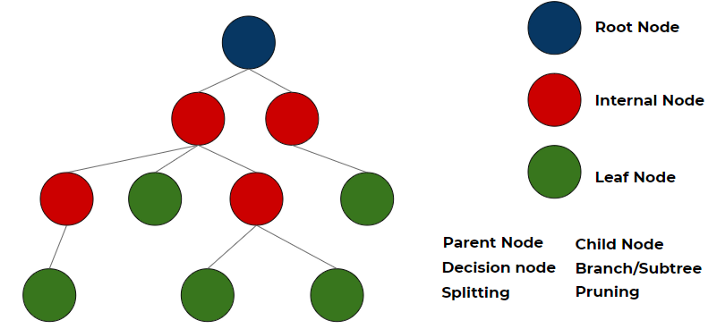

*Source: Google Images*

- Parent node: In any two connected nodes, the one which is higher hierarchically, is a parent node.
- Child node: In any two connected nodes, the one which is lower hierarchically, is a child node.
- Root node: The starting node from which the tree starts, It has only child nodes. The root node does not have a parent node. 
- Leaf Node: Nodes at the end of the tree, which do not have any children are leaf nodes or called simply leaf. 
- Internal nodes: In-between the root node and the leaf nodes are internal nodes. Internal nodes have both a parent and at least one child. 
- Splitting: Dividing a node into two or more sun-nodes or adding two or more children to a node.
- Decision node: when a parent splits into two or more children nodes then that node is called a decision node.
- Pruning: When we remove the sub-node of a decision node, it is called pruning. You can understand it as the opposite process of splitting.
- Branch/Sub-tree: a subsection of the entire tree is called a branch or sub-tree.

*Source: Analytics Vidhya*


In [11]:
# Importing libraries in Python
import sklearn.datasets as datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
#Upload file from computer
from google.colab import files
uploaded = files.upload()

Saving Iris.csv to Iris.csv


In [13]:
#read file
import io
df = pd.read_csv(io.BytesIO(uploaded['Iris.csv']))

In [14]:
print(df.head(5))

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [15]:
df.shape

(150, 6)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [17]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


Min value of sepal length = 4.3 and max value = 7.9. Mean = 5.8

### Data Wrangling

In [19]:
#Check Duplicates
df.duplicated().sum()

0

In [21]:
#Check Missing Values 
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Data has no duplicates or missing values 

# Data Visualizations

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


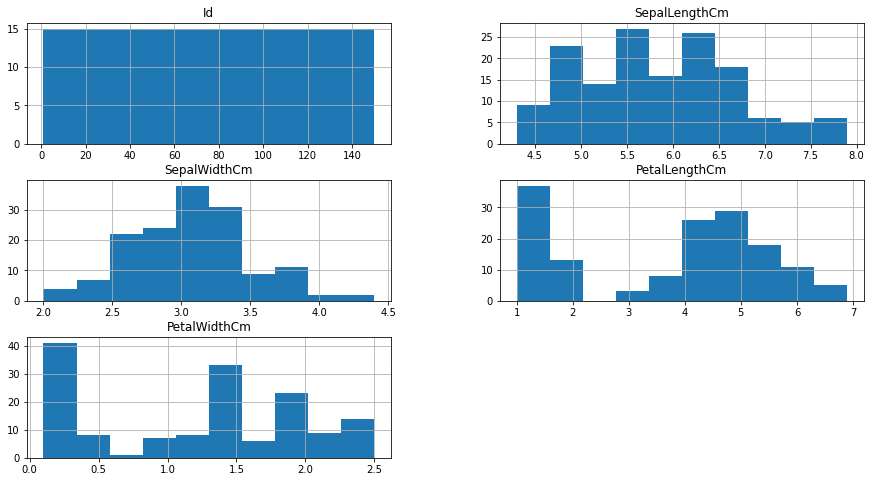

In [24]:
#Plot histogram to study distribution of numerical columns
fig = plt.figure(figsize = (15,8))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

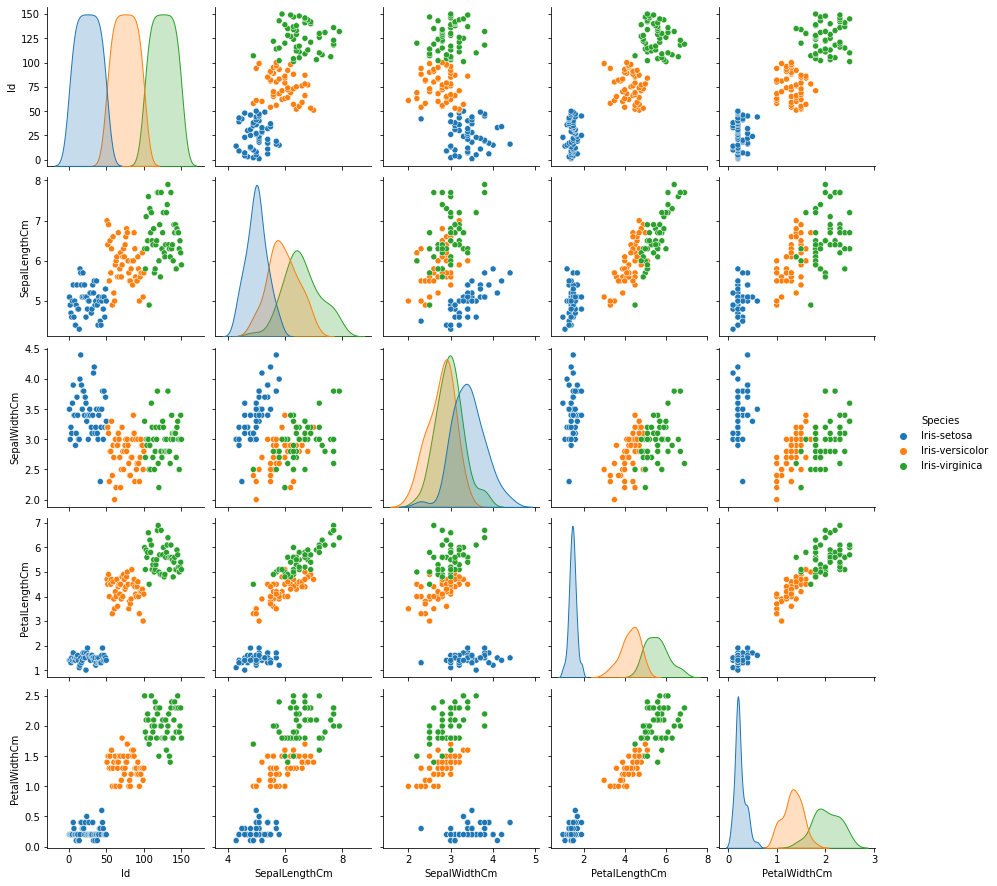

In [26]:
#Pair plot
sns.pairplot(df, hue='Species')

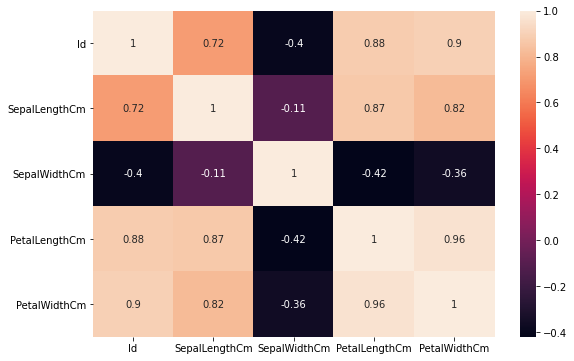

In [27]:
fig,axes = plt.subplots(1,1,figsize=(9,6))
sns.heatmap(df.corr(), annot= True)
plt.show()

Highest positive correlation is between PetalLengthcm and PetalWidthcm - 88%

# Data Preparation 

In [29]:
#Independent Variables
X = df.iloc[:,1:5]
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [31]:
#Dependent Variable
y = df['Species']
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

# Model Building

In [33]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=42)

In [34]:
print("Training split input- ", X_train.shape)
print("Testing split input- ", X_test.shape)

Training split input-  (120, 4)
Testing split input-  (30, 4)


In [35]:
# Defining the decision tree algorithm
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)

print('Decision Tree Classifer Created')

Decision Tree Classifer Created


In [37]:
# Predicting the values of test data
y_pred = dtree.predict(X_test)

In [45]:
from sklearn.metrics import classification_report, confusion_matrix
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


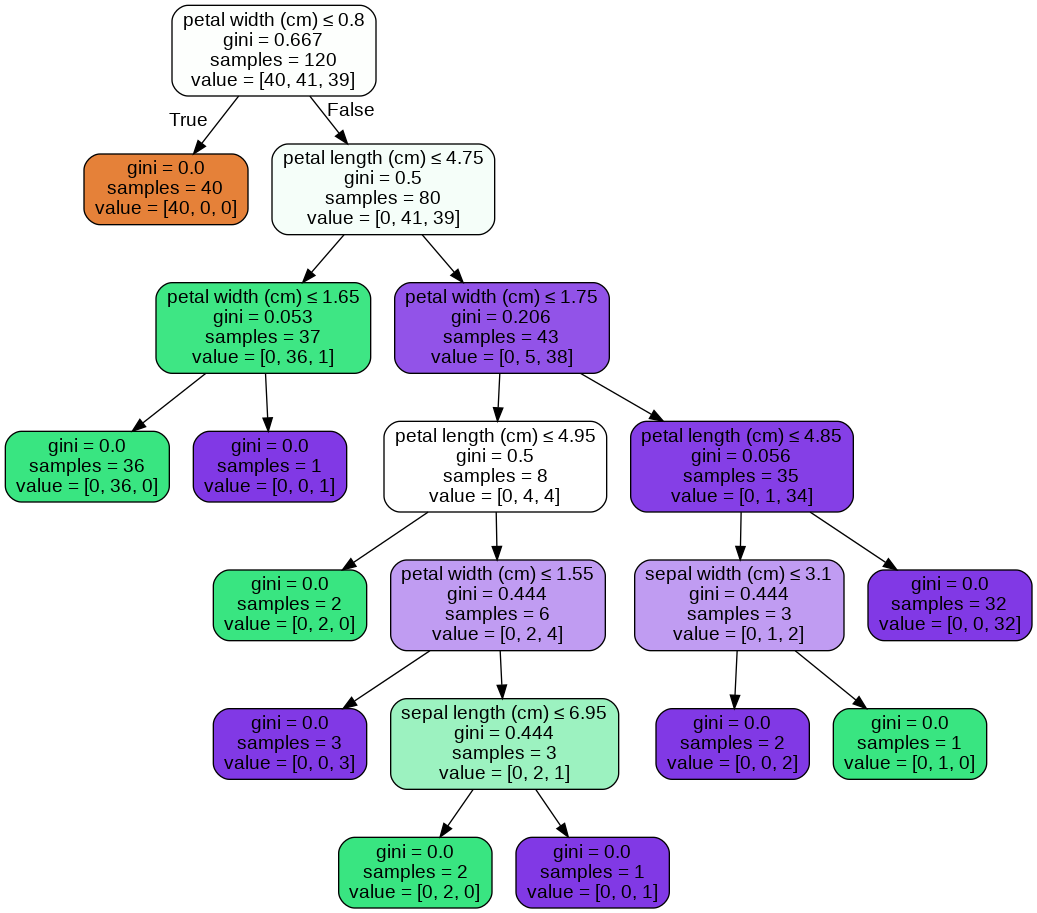

In [46]:
# Import necessary libraries for graph viz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# Visualize the graph
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, feature_names=iris.feature_names,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())